In [63]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns 
#from sklearn.model_selection import cross_val_score

In [64]:
os.chdir("/home/aimsadmin/Documents/Documents/aims/telecommunication/Data by cluster and powe type")
Gen= pd.read_excel("All cluster.xlsx",sheet_name="Gen Only")
#y = features['Consumption HIS']
Gen['QTE TOTALE LAISSEE'].fillna(Gen['QTE TOTALE LAISSEE'].mean(),inplace=True)
Gen['Consumption HIS'].fillna(Gen['Consumption HIS'].mean(),inplace=True)
Gen['NBRE DE JOUR'].fillna(Gen['NBRE DE JOUR'].mean(),inplace=True)
Gen['NBRE HEURES DE FONCTIONNEMENT DG1'].fillna(Gen['NBRE HEURES DE FONCTIONNEMENT DG1'].mean(),inplace=True)
Gen['CONSOMMATION HORAIRE DE FUEL DG1'].fillna(Gen['CONSOMMATION HORAIRE DE FUEL DG1'].mean(),inplace=True)

Out of 2784 almost 750 cases the genrator was running above 24 hours.

False    1992
True      792
Name: status, dtype: int64

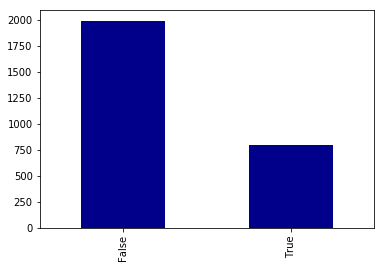

In [65]:
Gen['Running_hours_Perday']=Gen['NBRE HEURES DE FONCTIONNEMENT DG1']/Gen['NBRE DE JOUR']
Gen['status'] = Gen['Running_hours_Perday']> 24
Gen['status'].value_counts().plot(kind='bar', color = "darkblue")
Gen['status'].value_counts()

The fuel consumed is more than what they can consumed in a day. The first case of generator running for more than 24 also implies this one.

False    1927
True      857
Name: Consumeed_more_than_maximum, dtype: int64

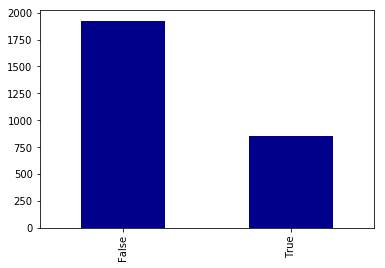

In [66]:
Gen['Maximum_consumption_perDay'] = Gen[['CONSOMMATION HORAIRE DE FUEL DG1']]*24
Gen['consumption_perDay_within_a_period'] = Gen['Consumption HIS']/(Gen['NBRE DE JOUR'])
Gen.loc[~np.isfinite(Gen['consumption_perDay_within_a_period']), 'consumption_perDay_within_a_period'] = 0
Gen['Consumeed_more_than_maximum'] =Gen['consumption_perDay_within_a_period']> Gen['Maximum_consumption_perDay']


Gen['Consumeed_more_than_maximum'].value_counts().plot(kind='bar', color = "darkblue")
Gen['Consumeed_more_than_maximum'].value_counts()

We have 140 where running hours of the generator is indicated as zero that means the consumption is zero. but the difference between the fuel found on the generator and previously left on the generatot is not the same

In [67]:
Gen['Quanitity_consumed_btn_visits'] = Gen['QTE FUEL PRECEDENTE'] - Gen['QTE FUEL TROUVEE']
Fraud = []
for i in range(len(list(Gen['NBRE HEURES DE FONCTIONNEMENT DG1']))):
    if list(Gen['NBRE HEURES DE FONCTIONNEMENT DG1'])[i] == 0 and list(Gen['Quanitity_consumed_btn_visits'])[i] >0:
        Fraud.append(-1)
    else:
        Fraud.append(1)

 1    2644
-1     140
dtype: int64

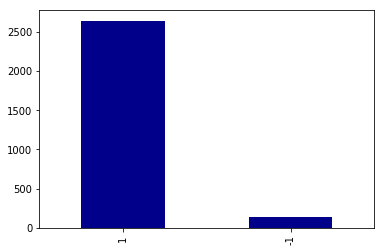

In [68]:
pd.Series(Fraud).value_counts().plot(kind='bar', color = "darkblue")
pd.Series(Fraud).value_counts()